**Imports**

In [31]:
# OS utilities
import os

# Data handling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data analysis
from collections import Counter
from itertools import combinations

**Data Loading**

In [4]:
data_path = "/media/SSD_2TB/imageclef2025/imageclef2025/development_concept_detection"

In [5]:
train_concepts = pd.read_csv(os.path.join(data_path, 'train_concepts.csv'))
valid_concepts = pd.read_csv(os.path.join(data_path, 'valid_concepts.csv'))

In [6]:
print(f"\nInitial dataset sizes for the concept detection task:")  
print(f"  - Training set: {len(train_concepts)} samples")  
print(f"  - Validation set: {len(valid_concepts)} samples")  


Initial dataset sizes for the concept detection task:
  - Training set: 80091 samples
  - Validation set: 17277 samples


In [7]:
concepts_dataset = pd.concat([train_concepts, valid_concepts]).reset_index(drop=True)

In [8]:
print(f"\nCombined dataset size for the concept detection task:")  
print(f"  - Training + Validation set: {len(concepts_dataset)} samples")  


Combined dataset size for the concept detection task:
  - Training + Validation set: 97368 samples


**1) Dataset Inspection**

In [10]:
concepts_dataset.head()

,ImageCLEFmedical 2025 ID,Cuis
0,ImageCLEFmedical_Caption_2025_train_0,C0040405
1,ImageCLEFmedical_Caption_2025_train_1,C1306645;C0817096;C0442800;C0018787;C0242073
2,ImageCLEFmedical_Caption_2025_train_2,C0040405;C0856747
3,ImageCLEFmedical_Caption_2025_train_3,C0041618
4,ImageCLEFmedical_Caption_2025_train_4,C0040405;C0040053


In [11]:
concepts_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97368 entries, 0 to 97367
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ImageCLEFmedical 2025 ID  97368 non-null  object
 1   Cuis                      97368 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


**2) Most Common Tags**

In [12]:
concepts_dataset["Cuis List"] = concepts_dataset["Cuis"].str.split(";")

all_cuis = [cui for sublist in concepts_dataset["Cuis List"] for cui in sublist]
cui_counts = Counter(all_cuis)

print(f"Total unique CUIs: {len(cui_counts)}")

Total unique CUIs: 2479


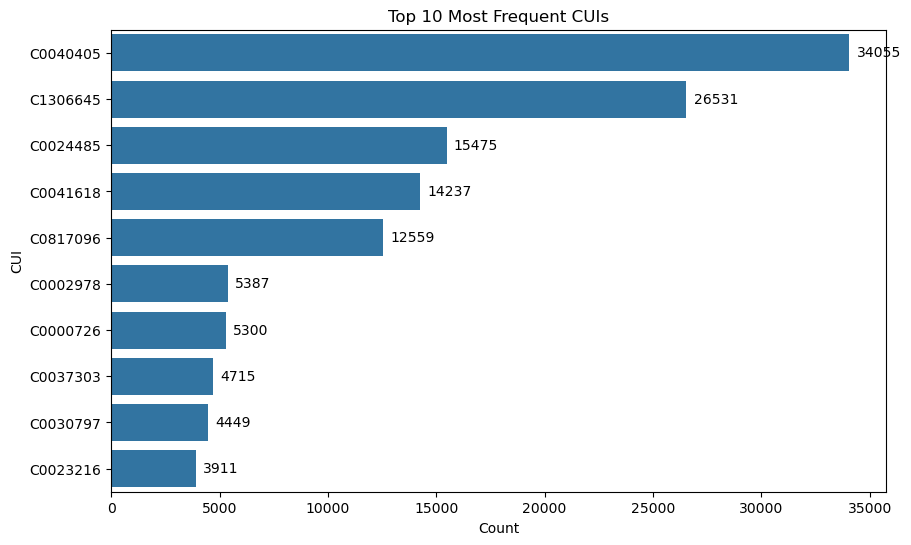

In [30]:
top_cuis = cui_counts.most_common(10)
top_cui_labels, top_cui_values = zip(*top_cuis)

plt.figure(figsize=(10, 6))

ax = sns.barplot(x=top_cui_values, y=top_cui_labels)

for i, value in enumerate(top_cui_values):
    ax.text(value + max(top_cui_values) * 0.01, i, str(value), va='center')

plt.xlabel("Count")
plt.ylabel("CUI")
plt.title("Top 10 Most Frequent CUIs")

plt.show()

**3) CUIs per Image Distribution**

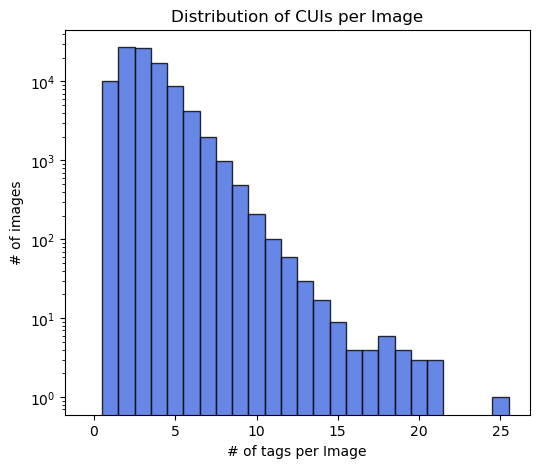

In [26]:
concepts_dataset["Num Cuis"] = concepts_dataset["Cuis List"].apply(len)

plt.figure(figsize=(6, 5)) 

plt.hist(concepts_dataset["Num Cuis"], bins=np.arange(0, 27) - 0.5, color='royalblue', edgecolor='black', alpha=0.8)

plt.yscale('log')

plt.xlabel("# of tags per Image")
plt.ylabel("# of images")
plt.title("Distribution of CUIs per Image")

plt.show()

**4) CUI Co-Occurence Analysis**

In [ ]:
cui_pairs = Counter()
for cuis in concepts_dataset["Cuis List"]:
    for pair in combinations(cuis, 2): 
        cui_pairs[pair] += 1

cui_matrix = pd.DataFrame(cui_pairs.items(), columns=["CUI Pair", "Count"])
cui_matrix.sort_values(by="Count", ascending=False).head(10)

,CUI_Pair,Count
0,"(C1306645, C0817096)",9297
338,"(C1306645, C0037303)",4572
285,"(C1306645, C0023216)",3848
12,"(C0040405, C0817096)",2937
196,"(C1306645, C0000726)",2922
21,"(C1306645, C0030797)",2074
140,"(C0040405, C0000726)",2061
656,"(C1306645, C1140618)",1836
39,"(C0040405, C0030797)",1753
295,"(C1306645, C0037949)",1662


In [21]:
cui_pairs = Counter()
for cuis in concepts_dataset["Cuis List"]:
    for pair in combinations(cuis, 3): 
        cui_pairs[pair] += 1

cui_matrix = pd.DataFrame(cui_pairs.items(), columns=["CUI Pair", "Count"])
cui_matrix.sort_values(by="Count", ascending=False).head(10)

,CUI Pair,Count
693,"(C1306645, C0817096, C0032227)",645
3446,"(C0040405, C0000726, C0030797)",643
943,"(C1306645, C0037303, C0024687)",605
2069,"(C1306645, C0023216, C0015811)",432
1,"(C1306645, C0817096, C0018787)",425
468,"(C1306645, C0817096, C0032326)",383
3396,"(C1306645, C0037303, C0011443)",361
463,"(C1306645, C0817096, C1383860)",341
1900,"(C1306645, C0817096, C0225759)",326
939,"(C1306645, C0037303, C0024947)",312


**5) Long-Tail Distribution**

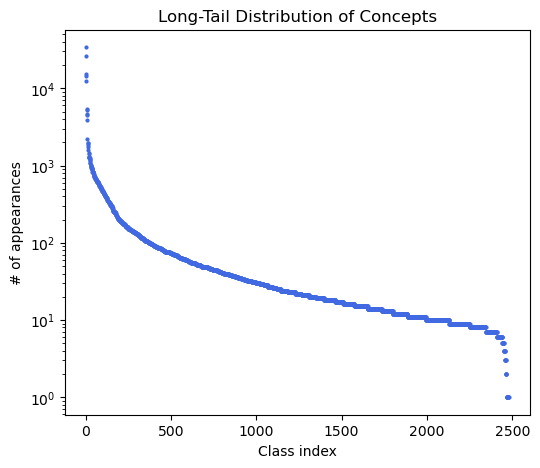

In [27]:
cui_occurrences = pd.Series(all_cuis).value_counts() 

sorted_occurrences = cui_occurrences.sort_values(ascending=False).values

plt.figure(figsize=(6, 5))
plt.plot(sorted_occurrences, marker='o', linestyle='none', markersize=2, color='royalblue')

plt.yscale('log')

plt.xlabel("Class index")
plt.ylabel("# of appearances")
plt.title("Long-Tail Distribution of Concepts")

plt.show()